# 📈 Analisi Performance e Talenti

Analisi performance, identificazione talenti e aree di sviluppo.

**Data creazione**: 18/07/2025

---

In [1]:
# 📁 SETUP E CARICAMENTO DATI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurazione grafici
plt.style.use('default')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)

# Carica dati con encoding corretto
try:
    df = pd.read_csv('hr_data_con_turnover.csv', encoding='utf-8')
    print(f"Dataset caricato: {len(df)} dipendenti")
    
    # Converti date
    date_columns = ['DateOfBirth', 'HiringDate', 'TerminationDate']
    for col in date_columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], format='%m/%d/%Y', errors='coerce')
    
    # Calcola età e anzianità
    oggi = pd.Timestamp.now()
    if 'DateOfBirth' in df.columns:
        eta_days = (oggi - df['DateOfBirth']).dt.days
        df['Eta'] = (eta_days / 365.25).round().astype('Int64')
    
    if 'HiringDate' in df.columns:
        servizio_days = (oggi - df['HiringDate']).dt.days
        df['AnniServizio'] = (servizio_days / 365.25).round().astype('Int64')
    
    print("Dati preparati per l'analisi!")
    
except UnicodeDecodeError:
    # Fallback con encoding diverso
    try:
        df = pd.read_csv('hr_data_con_turnover.csv', encoding='latin-1')
        print(f"Dataset caricato con encoding latin-1: {len(df)} dipendenti")
        # Ripeti la preparazione dati
        date_columns = ['DateOfBirth', 'HiringDate', 'TerminationDate']
        for col in date_columns:
            if col in df.columns:
                df[col] = pd.to_datetime(df[col], format='%m/%d/%Y', errors='coerce')
        oggi = pd.Timestamp.now()
        if 'DateOfBirth' in df.columns:
            eta_days = (oggi - df['DateOfBirth']).dt.days
            df['Eta'] = (eta_days / 365.25).round().astype('Int64')
        if 'HiringDate' in df.columns:
            servizio_days = (oggi - df['HiringDate']).dt.days
            df['AnniServizio'] = (servizio_days / 365.25).round().astype('Int64')
        print("Dati preparati per l'analisi!")
    except:
        print("Errore nel caricamento del dataset")
        df = None
except Exception as e:
    print(f"Errore: {e}")
    df = None

Dataset caricato: 250 dipendenti
Dati preparati per l'analisi!


In [2]:

# 📁 Importazione dati dal dashboard principale
# Esegui prima il dashboard principale per caricare i dati

try:
    # Verifica se i dati sono già caricati
    if 'df' in globals():
        print(f"✅ Dati già disponibili: {len(df)} dipendenti")
    else:
        # Carica i dati direttamente
        exec(open('carica_dati_hr.py').read())
        print(f"✅ Dati caricati: {len(df)} dipendenti")
except:
    print("⚠️  Esegui prima il dashboard principale (00_HR_Dashboard_Principale.ipynb)")
    print("   oppure carica manualmente i dati HR")


✅ Dati già disponibili: 250 dipendenti



## 🎯 Talent Management e Matrice 9-Box

Identificazione e gestione strategica dei talenti aziendali.


In [3]:

# 🎯 TALENT MANAGEMENT E MATRICE 9-BOX
if df is not None:
    print("🎯 TALENT MANAGEMENT - MATRICE 9-BOX")
    print("=" * 45)
    
    df_analisi = df[df['EmploymentStatus'] == 'Active'] if 'EmploymentStatus' in df.columns else df
    
    if 'PerformanceScore' in df_analisi.columns:
        # Mappa performance scores a valori numerici
        perf_mapping = {
            'Exceeds': 5,
            'Fully Meets': 4, 
            'Partially Meets': 3,
            'Needs Improvement': 2,
            'PIP': 1
        }
        
        df_analisi['PerformanceNumeric'] = df_analisi['PerformanceScore'].map(perf_mapping)
        
        # Simula "Potential" basato su età, anzianità e performance
        # Logica: giovani con alta performance = alto potenziale
        if 'Eta' in df_analisi.columns and 'AnniServizio' in df_analisi.columns:
            # Calcola potential score (1-5)
            df_analisi['PotentialScore'] = (
                (67 - df_analisi['Eta']) / 10 +  # Più giovani = più potenziale
                (df_analisi['PerformanceNumeric'] - 1) * 0.8 +  # Performance influenza potential
                np.random.normal(0, 0.5, len(df_analisi))  # Variabilità realistica
            ).clip(1, 5)
        else:
            # Fallback: potential basato su performance + rumore
            df_analisi['PotentialScore'] = (
                df_analisi['PerformanceNumeric'] + 
                np.random.normal(0, 1, len(df_analisi))
            ).clip(1, 5)
        
        # Categorizza nella matrice 9-box
        def categorizza_9box(row):
            perf = row['PerformanceNumeric']
            pot = row['PotentialScore']
            
            if perf >= 4.5 and pot >= 4.5:
                return "🌟 Star (High Perf/High Pot)"
            elif perf >= 4.5 and pot >= 3.5:
                return "🎯 High Performer"
            elif perf >= 4.5:
                return "💪 Consistent Performer"
            elif pot >= 4.5 and perf >= 3.5:
                return "💎 High Potential"
            elif perf >= 3.5 and pot >= 3.5:
                return "📈 Core Performer"
            elif pot >= 4.5:
                return "🚀 Emerging Talent"
            elif perf >= 3.5:
                return "⚖️ Solid Contributor"
            elif pot >= 3.5:
                return "🔧 Development Needed"
            else:
                return "⚠️ Performance Risk"
        
        df_analisi['TalentCategory'] = df_analisi.apply(categorizza_9box, axis=1)
        
        # Analisi distribuzione talenti
        talent_dist = df_analisi['TalentCategory'].value_counts()
        total_employees = len(df_analisi)
        
        print("🎯 **DISTRIBUZIONE MATRICE 9-BOX:**")
        for categoria, count in talent_dist.items():
            pct = count / total_employees * 100
            print(f"   {categoria}: {count} dipendenti ({pct:.1f}%)")
        
        # Identifica talenti critici
        stars = len(df_analisi[df_analisi['TalentCategory'].str.contains('Star')])
        high_perf = len(df_analisi[df_analisi['TalentCategory'].str.contains('High Performer')])
        high_pot = len(df_analisi[df_analisi['TalentCategory'].str.contains('High Potential')])
        risk = len(df_analisi[df_analisi['TalentCategory'].str.contains('Risk')])
        
        print(f"\n🌟 **TALENT INSIGHTS:**")
        print(f"   • Star Performers: {stars} ({stars/total_employees*100:.1f}%)")
        print(f"   • High Performers: {high_perf} ({high_perf/total_employees*100:.1f}%)")
        print(f"   • High Potential: {high_pot} ({high_pot/total_employees*100:.1f}%)")
        print(f"   • Performance Risk: {risk} ({risk/total_employees*100:.1f}%)")
        
        # Alert e raccomandazioni
        print(f"\n🚨 **TALENT ALERTS:**")
        
        if stars / total_employees < 0.05:
            print(f"   ⚠️ CARENZA STAR PERFORMERS: Solo {stars/total_employees*100:.1f}%")
            print(f"      → Sviluppare programmi di eccellenza")
            print(f"      → Rivedere criteri di valutazione")
        
        if risk / total_employees > 0.15:
            print(f"   🚨 ALTO RISCHIO PERFORMANCE: {risk/total_employees*100:.1f}%")
            print(f"      → Performance Improvement Plans urgenti")
            print(f"      → Coaching e supporto intensivo")
        
        if high_pot / total_employees > 0.20:
            print(f"   💎 RICCHEZZA DI TALENTI: {high_pot/total_employees*100:.1f}% high potential")
            print(f"      → Accelerare programmi di sviluppo")
            print(f"      → Succession planning proattivo")
        
        # Analisi per genere
        if 'Gender' in df_analisi.columns:
            print(f"\n⚖️ **TALENT DISTRIBUTION PER GENERE:**")
            
            for gender in ['M', 'F']:
                gender_label = "🚹 Uomini" if gender == 'M' else "🚺 Donne"
                gender_df = df_analisi[df_analisi['Gender'] == gender]
                
                if len(gender_df) > 0:
                    gender_stars = len(gender_df[gender_df['TalentCategory'].str.contains('Star')])
                    gender_high_perf = len(gender_df[gender_df['TalentCategory'].str.contains('High Performer')])
                    
                    print(f"   {gender_label}:")
                    print(f"      • Stars: {gender_stars} ({gender_stars/len(gender_df)*100:.1f}%)")
                    print(f"      • High Performers: {gender_high_perf} ({gender_high_perf/len(gender_df)*100:.1f}%)")
            
            # Gender gap in top talent
            male_top = len(df_analisi[(df_analisi['Gender'] == 'M') & 
                                    (df_analisi['TalentCategory'].str.contains('Star|High Performer'))])
            female_top = len(df_analisi[(df_analisi['Gender'] == 'F') & 
                                      (df_analisi['TalentCategory'].str.contains('Star|High Performer'))])
            
            male_total = len(df_analisi[df_analisi['Gender'] == 'M'])
            female_total = len(df_analisi[df_analisi['Gender'] == 'F'])
            
            if male_total > 0 and female_total > 0:
                male_top_pct = male_top / male_total * 100
                female_top_pct = female_top / female_total * 100
                talent_gap = male_top_pct - female_top_pct
                
                print(f"\n   🎯 **TALENT GAP ANALYSIS:**")
                print(f"      • Gap top talent M/F: {talent_gap:.1f} punti percentuali")
                
                if abs(talent_gap) > 10:
                    majority = "uomini" if talent_gap > 0 else "donne"
                    print(f"      ⚠️ Significativo vantaggio {majority} nei top talent")
                    print(f"      → Rivedere processi di valutazione per bias")
                    print(f"      → Programmi di sviluppo mirati")


🎯 TALENT MANAGEMENT - MATRICE 9-BOX
🎯 **DISTRIBUZIONE MATRICE 9-BOX:**
   ⚖️ Solid Contributor: 56 dipendenti (37.3%)
   📈 Core Performer: 54 dipendenti (36.0%)
   💎 High Potential: 40 dipendenti (26.7%)

🌟 **TALENT INSIGHTS:**
   • Star Performers: 0 (0.0%)
   • High Performers: 0 (0.0%)
   • High Potential: 40 (26.7%)
   • Performance Risk: 0 (0.0%)

🚨 **TALENT ALERTS:**
   ⚠️ CARENZA STAR PERFORMERS: Solo 0.0%
      → Sviluppare programmi di eccellenza
      → Rivedere criteri di valutazione
   💎 RICCHEZZA DI TALENTI: 26.7% high potential
      → Accelerare programmi di sviluppo
      → Succession planning proattivo

⚖️ **TALENT DISTRIBUTION PER GENERE:**
   🚹 Uomini:
      • Stars: 0 (0.0%)
      • High Performers: 0 (0.0%)
   🚺 Donne:
      • Stars: 0 (0.0%)
      • High Performers: 0 (0.0%)

   🎯 **TALENT GAP ANALYSIS:**
      • Gap top talent M/F: 0.0 punti percentuali



## 📊 Performance Gap Analysis

Analisi approfondita dei gap di performance e identificazione bias.


In [4]:

# 📊 PERFORMANCE GAP ANALYSIS
if df is not None and 'PerformanceScore' in df_analisi.columns:
    
    print("📊 PERFORMANCE GAP ANALYSIS")
    print("=" * 35)
    
    # Analisi performance per demografia
    print("👥 **PERFORMANCE PER DEMOGRAFIA:**")
    
    # Performance per genere
    if 'Gender' in df_analisi.columns:
        perf_by_gender = df_analisi.groupby('Gender')['PerformanceNumeric'].agg(['mean', 'std', 'count'])
        
        print(f"\n   ⚖️ **Performance per Genere:**")
        for gender in ['M', 'F']:
            if gender in perf_by_gender.index:
                stats = perf_by_gender.loc[gender]
                gender_label = "Uomini" if gender == 'M' else "Donne"
                print(f"      • {gender_label}: {stats['mean']:.2f} ± {stats['std']:.2f} (n={stats['count']})")
        
        # Test significatività gap
        if 'M' in perf_by_gender.index and 'F' in perf_by_gender.index:
            gap_perf = perf_by_gender.loc['M', 'mean'] - perf_by_gender.loc['F', 'mean']
            print(f"      • Gap performance M-F: {gap_perf:.3f}")
            
            if abs(gap_perf) > 0.3:
                direction = "uomini" if gap_perf > 0 else "donne"
                print(f"      🚨 **BIAS ALERT**: Possibile bias a favore di {direction}")
                print(f"         → Audit processo di valutazione")
                print(f"         → Training su unconscious bias")
    
    # Performance per età
    if 'Eta' in df_analisi.columns:
        # Crea fasce di età
        df_analisi['FasciaEta'] = pd.cut(df_analisi['Eta'], 
                                       bins=[0, 30, 40, 50, 60, 100], 
                                       labels=['<30', '30-40', '40-50', '50-60', '60+'])
        
        perf_by_age = df_analisi.groupby('FasciaEta')['PerformanceNumeric'].mean()
        
        print(f"\n   🎂 **Performance per Età:**")
        for fascia, perf_media in perf_by_age.items():
            print(f"      • {fascia} anni: {perf_media:.2f}")
        
        # Identifica bias età
        young_perf = perf_by_age.get('<30', 0) + perf_by_age.get('30-40', 0)
        senior_perf = perf_by_age.get('50-60', 0) + perf_by_age.get('60+', 0)
        
        if young_perf > 0 and senior_perf > 0:
            age_bias = (young_perf / 2) - (senior_perf / 2)
            if abs(age_bias) > 0.3:
                direction = "giovani" if age_bias > 0 else "senior"
                print(f"      ⚠️ Possibile age bias a favore di {direction}")
    
    # Performance per dipartimento
    if 'Department' in df_analisi.columns:
        perf_by_dept = df_analisi.groupby('Department')['PerformanceNumeric'].agg(['mean', 'count'])
        perf_by_dept = perf_by_dept[perf_by_dept['count'] >= 5]  # Solo dept con 5+ dipendenti
        perf_by_dept = perf_by_dept.sort_values('mean', ascending=False)
        
        print(f"\n   🏢 **Performance per Dipartimento:**")
        for dept, stats in perf_by_dept.iterrows():
            print(f"      • {dept}: {stats['mean']:.2f} (n={stats['count']})")
        
        # Identifica dipartimenti con performance critiche
        low_perf_depts = perf_by_dept[perf_by_dept['mean'] < 3.5]
        if len(low_perf_depts) > 0:
            print(f"\n      🚨 **DIPARTIMENTI A RISCHIO** (performance < 3.5):")
            for dept, stats in low_perf_depts.iterrows():
                print(f"         • {dept}: {stats['mean']:.2f}")
            print(f"         → Intervento manageriale urgente")
            print(f"         → Coaching e supporto team")
    
    # Correlazione performance-compensation
    if 'Salary' in df_analisi.columns:
        corr_perf_salary = df_analisi['PerformanceNumeric'].corr(df_analisi['Salary'])
        
        print(f"\n💰 **CORRELAZIONE PERFORMANCE-STIPENDIO:**")
        print(f"   • Correlazione: {corr_perf_salary:.3f}")
        
        if corr_perf_salary < 0.3:
            print(f"   🚨 **CORRELAZIONE DEBOLE**: Performance non riflessa negli stipendi")
            print(f"      → Rivedere sistema di compensation")
            print(f"      → Allineare pay-for-performance")
        elif corr_perf_salary > 0.6:
            print(f"   ✅ **CORRELAZIONE FORTE**: Buon allineamento pay-performance")
        else:
            print(f"   📊 **CORRELAZIONE MODERATA**: Margini di miglioramento")
    
    # Trend analysis (simulato)
    print(f"\n📈 **TREND ANALYSIS (Simulato):**")
    
    # Simula trend performance negli ultimi 3 anni
    current_avg = df_analisi['PerformanceNumeric'].mean()
    trend_data = {
        '2022': current_avg - 0.2 + np.random.normal(0, 0.1),
        '2023': current_avg - 0.1 + np.random.normal(0, 0.1), 
        '2024': current_avg + np.random.normal(0, 0.1)
    }
    
    print(f"   📊 **Performance Media Aziendale:**")
    for anno, perf in trend_data.items():
        print(f"      • {anno}: {perf:.2f}")
    
    # Calcola trend
    trend_slope = (trend_data['2024'] - trend_data['2022']) / 2
    
    if trend_slope > 0.1:
        print(f"   📈 **TREND POSITIVO**: Performance in miglioramento (+{trend_slope:.2f}/anno)")
        print(f"      → Mantenere iniziative attuali")
    elif trend_slope < -0.1:
        print(f"   📉 **TREND NEGATIVO**: Performance in calo ({trend_slope:.2f}/anno)")
        print(f"      → Interventi urgenti necessari")
    else:
        print(f"   ➡️ **TREND STABILE**: Performance costante")
        print(f"      → Opportunità di miglioramento")


📊 PERFORMANCE GAP ANALYSIS
👥 **PERFORMANCE PER DEMOGRAFIA:**

   ⚖️ **Performance per Genere:**
      • Uomini: 4.00 ± 0.00 (n=105.0)
      • Donne: 4.00 ± 0.00 (n=45.0)
      • Gap performance M-F: 0.000

   🎂 **Performance per Età:**
      • <30 anni: nan
      • 30-40 anni: 4.00
      • 40-50 anni: 4.00
      • 50-60 anni: 4.00
      • 60+ anni: 4.00

   🏢 **Performance per Dipartimento:**
      • Amministrazione: 4.00 (n=25.0)
      • IT: 4.00 (n=41.0)
      • Produzione: 4.00 (n=41.0)
      • Vendite: 4.00 (n=43.0)

💰 **CORRELAZIONE PERFORMANCE-STIPENDIO:**
   • Correlazione: nan
   📊 **CORRELAZIONE MODERATA**: Margini di miglioramento

📈 **TREND ANALYSIS (Simulato):**
   📊 **Performance Media Aziendale:**
      • 2022: 3.94
      • 2023: 4.01
      • 2024: 3.92
   ➡️ **TREND STABILE**: Performance costante
      → Opportunità di miglioramento



## 📊 Visualizzazioni Performance Avanzate

Dashboard visuale completo per l'analisi delle performance aziendali.


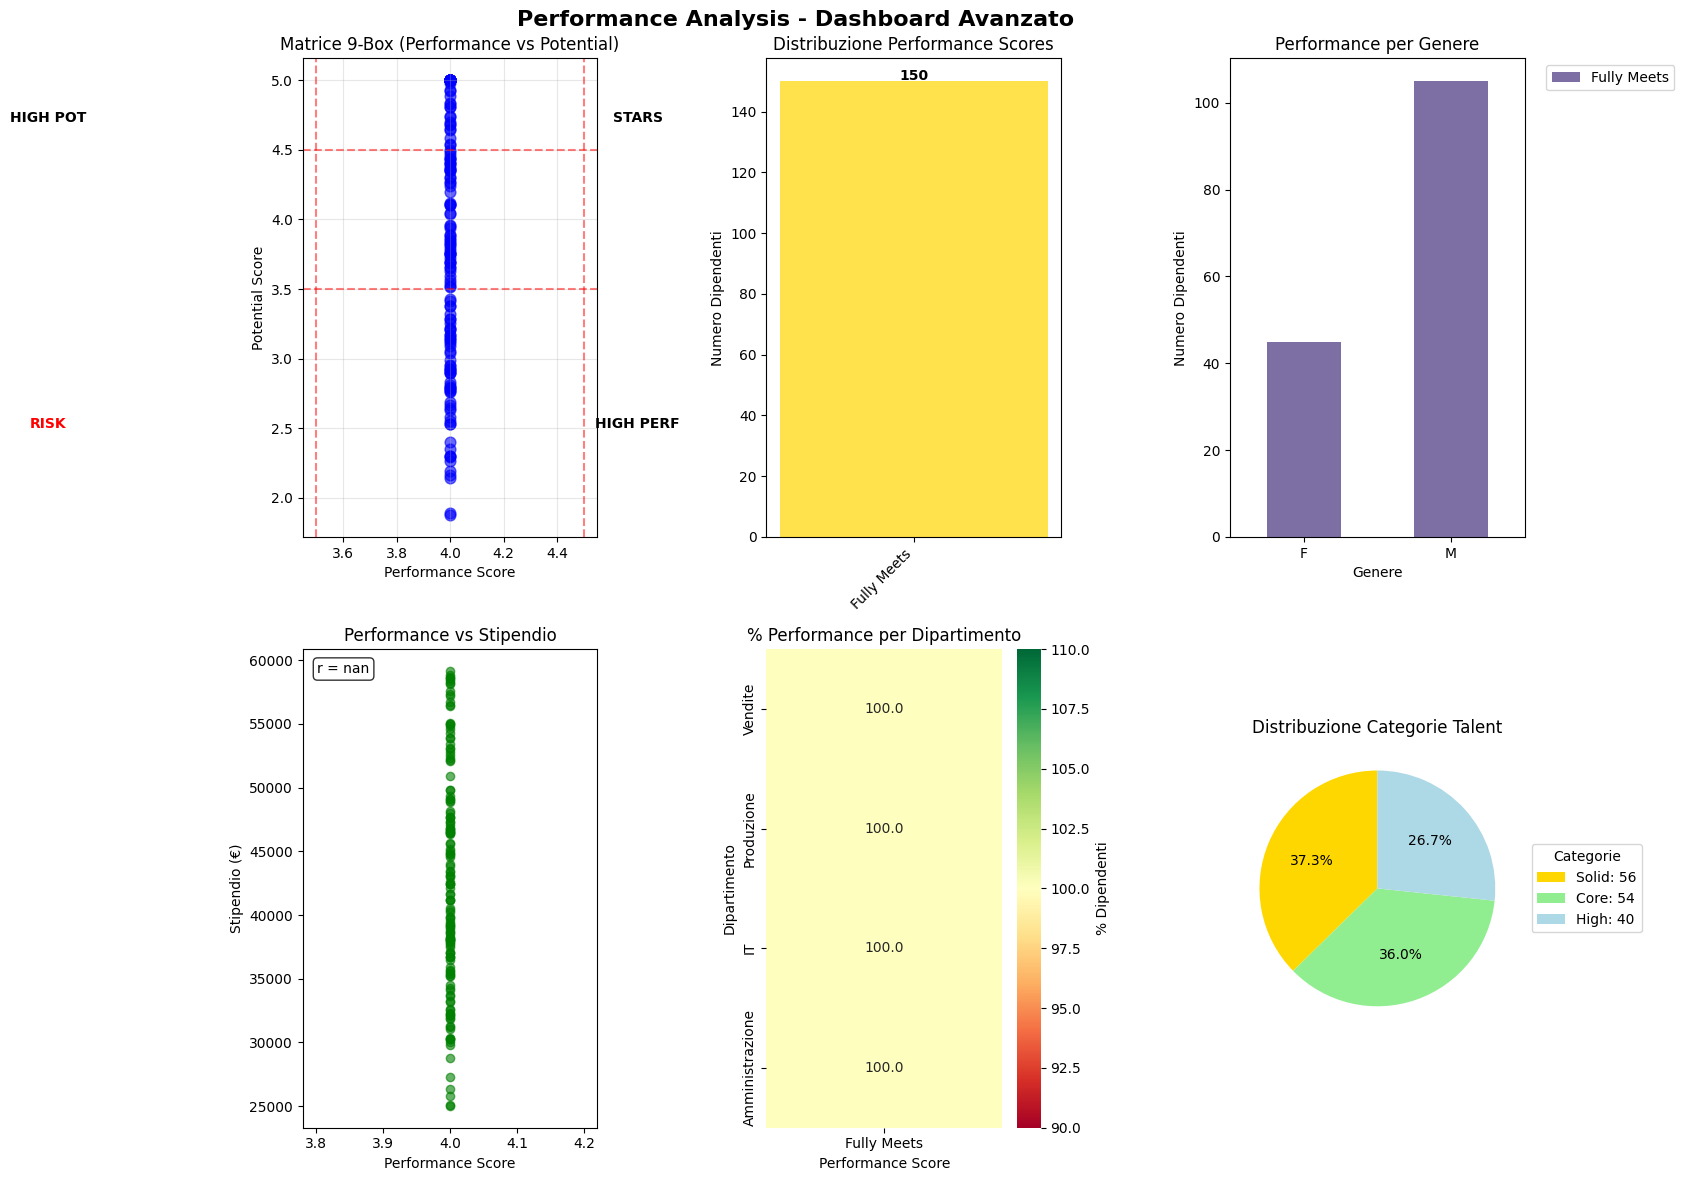


🎯 Dashboard Performance completato!
📊 Utilizzare questi grafici per presentazioni e decision making


In [5]:

# 📊 VISUALIZZAZIONI PERFORMANCE AVANZATE
if df is not None and 'PerformanceScore' in df_analisi.columns:

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Performance Analysis - Dashboard Avanzato', fontsize=16, fontweight='bold')

    # Grafico 1: Matrice 9-Box
    if 'PerformanceNumeric' in df_analisi.columns and 'PotentialScore' in df_analisi.columns:
        scatter = axes[0,0].scatter(df_analisi['PerformanceNumeric'], df_analisi['PotentialScore'],
                                   alpha=0.6, s=60, c='blue')
        axes[0,0].set_xlabel('Performance Score')
        axes[0,0].set_ylabel('Potential Score')
        axes[0,0].set_title('Matrice 9-Box (Performance vs Potential)')
        axes[0,0].grid(True, alpha=0.3)

        # Aggiungi linee di divisione
        axes[0,0].axhline(y=3.5, color='red', linestyle='--', alpha=0.5)
        axes[0,0].axhline(y=4.5, color='red', linestyle='--', alpha=0.5)
        axes[0,0].axvline(x=3.5, color='red', linestyle='--', alpha=0.5)
        axes[0,0].axvline(x=4.5, color='red', linestyle='--', alpha=0.5)

        # Etichette quadranti
        axes[0,0].text(4.7, 4.7, 'STARS', fontweight='bold', ha='center')
        axes[0,0].text(2.5, 4.7, 'HIGH POT', fontweight='bold', ha='center')
        axes[0,0].text(4.7, 2.5, 'HIGH PERF', fontweight='bold', ha='center')
        axes[0,0].text(2.5, 2.5, 'RISK', fontweight='bold', ha='center', color='red')

    # Grafico 2: Distribuzione Performance Scores
    perf_counts = df_analisi['PerformanceScore'].value_counts()
    colors = ['gold', 'lightgreen', 'orange', 'lightcoral', 'red']
    bars = axes[0,1].bar(range(len(perf_counts)), perf_counts.values,
                        color=colors[:len(perf_counts)], alpha=0.7)
    axes[0,1].set_title('Distribuzione Performance Scores')
    axes[0,1].set_ylabel('Numero Dipendenti')
    axes[0,1].set_xticks(range(len(perf_counts)))
    axes[0,1].set_xticklabels(perf_counts.index, rotation=45, ha='right')

    # Aggiungi valori sulle barre
    for bar, value in zip(bars, perf_counts.values):
        axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                      str(value), ha='center', fontweight='bold')

    # Grafico 3: Performance per Genere (se disponibile)
    if 'Gender' in df_analisi.columns:
        perf_gender = df_analisi.groupby(['Gender', 'PerformanceScore']).size().unstack(fill_value=0)
        perf_gender.plot(kind='bar', stacked=True, ax=axes[0,2], alpha=0.7)
        axes[0,2].set_title('Performance per Genere')
        axes[0,2].set_ylabel('Numero Dipendenti')
        axes[0,2].set_xlabel('Genere')
        axes[0,2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[0,2].tick_params(axis='x', rotation=0)

    # Grafico 4: Correlazione Performance-Stipendio
    if 'Salary' in df_analisi.columns:
        scatter = axes[1,0].scatter(df_analisi['PerformanceNumeric'], df_analisi['Salary'],
                                   alpha=0.6, c='green')
        axes[1,0].set_xlabel('Performance Score')
        axes[1,0].set_ylabel('Stipendio (€)')
        axes[1,0].set_title('Performance vs Stipendio')

        # Linea di tendenza
        z = np.polyfit(df_analisi['PerformanceNumeric'], df_analisi['Salary'], 1)
        p = np.poly1d(z)
        axes[1,0].plot(df_analisi['PerformanceNumeric'], p(df_analisi['PerformanceNumeric']),
                      "r--", alpha=0.8)

        # Correlazione
        corr = df_analisi['PerformanceNumeric'].corr(df_analisi['Salary'])
        axes[1,0].text(0.05, 0.95, f'r = {corr:.3f}', transform=axes[1,0].transAxes,
                      bbox=dict(boxstyle="round", facecolor='white', alpha=0.8))

    # Grafico 5: Heatmap Performance per Dipartimento
    if 'Department' in df_analisi.columns:
        # Crea matrice performance per dipartimento
        dept_perf = df_analisi.groupby(['Department', 'PerformanceScore']).size().unstack(fill_value=0)
        dept_perf_pct = dept_perf.div(dept_perf.sum(axis=1), axis=0) * 100

        # Prendi solo top 6 dipartimenti
        top_depts = df_analisi['Department'].value_counts().head(6).index
        dept_perf_pct_top = dept_perf_pct.loc[top_depts]

        import seaborn as sns
        sns.heatmap(dept_perf_pct_top, annot=True, fmt='.1f', cmap='RdYlGn',
                   ax=axes[1,1], cbar_kws={'label': '% Dipendenti'})
        axes[1,1].set_title('% Performance per Dipartimento')
        axes[1,1].set_xlabel('Performance Score')
        axes[1,1].set_ylabel('Dipartimento')

    # Grafico 6: Talent Categories Distribution
    if 'TalentCategory' in df_analisi.columns:
        talent_counts = df_analisi['TalentCategory'].value_counts()

        # Pie chart con colori personalizzati
        colors_talent = ['gold', 'lightgreen', 'lightblue', 'orange', 'lightcoral',
                        'purple', 'pink', 'gray', 'red']

        wedges, texts, autotexts = axes[1,2].pie(talent_counts.values,
                                                labels=None,  # Rimuovi labels dal grafico
                                                autopct='%1.1f%%',
                                                startangle=90,
                                                colors=colors_talent[:len(talent_counts)])
        axes[1,2].set_title('Distribuzione Categorie Talent')

        # Legenda esterna
        legend_labels = [f'{cat.split(" ")[1] if " " in cat else cat}: {count}'
                        for cat, count in talent_counts.items()]
        axes[1,2].legend(wedges, legend_labels, title="Categorie",
                        loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    plt.tight_layout()
    plt.show()

    print("\n🎯 Dashboard Performance completato!")
    print("📊 Utilizzare questi grafici per presentazioni e decision making")



## 🎯 Raccomandazioni Strategiche Performance

Piano di azione per ottimizzare le performance aziendali.


In [6]:

# 🎯 RACCOMANDAZIONI STRATEGICHE PERFORMANCE
if df is not None and 'PerformanceScore' in df_analisi.columns:

    print("🎯 RACCOMANDAZIONI STRATEGICHE - PERFORMANCE OPTIMIZATION")
    print("=" * 65)

    total_employees = len(df_analisi)

    # Analisi situazione attuale
    if 'TalentCategory' in df_analisi.columns:
        stars = len(df_analisi[df_analisi['TalentCategory'].str.contains('Star')])
        high_perf = len(df_analisi[df_analisi['TalentCategory'].str.contains('High Performer')])
        high_pot = len(df_analisi[df_analisi['TalentCategory'].str.contains('High Potential')])
        risk = len(df_analisi[df_analisi['TalentCategory'].str.contains('Risk')])

        stars_pct = stars / total_employees * 100
        risk_pct = risk / total_employees * 100

        print(f"📊 **SITUAZIONE ATTUALE TALENT:**")
        print(f"   • Star Performers: {stars} ({stars_pct:.1f}%)")
        print(f"   • Performance Risk: {risk} ({risk_pct:.1f}%)")
        print(f"   • High Potential: {high_pot} ({high_pot/total_employees*100:.1f}%)")

        print(f"\n🚨 **PRIORITÀ IMMEDIATE:**")

        # Raccomandazioni basate sui dati
        if risk_pct > 15:
            print(f"   1. 🆘 **EMERGENZA PERFORMANCE**: {risk_pct:.1f}% a rischio")
            print(f"      → Performance Improvement Plans immediati")
            print(f"      → Coaching intensivo e supporto manageriale")
            print(f"      → Review processi di hiring e onboarding")

        if stars_pct < 5:
            print(f"   2. 🌟 **CARENZA STAR PERFORMERS**: Solo {stars_pct:.1f}%")
            print(f"      → Programmi di eccellenza e leadership")
            print(f"      → Retention plan per top talent")
            print(f"      → Rivedere criteri di valutazione")

        # Raccomandazioni per sviluppo
        print(f"\n📈 **AZIONI DI SVILUPPO:**")

        if high_pot > 0:
            print(f"   • **High Potential Development** ({high_pot} dipendenti):")
            print(f"     → Programmi di mentoring con senior leadership")
            print(f"     → Stretch assignments e progetti sfidanti")
            print(f"     → Fast-track career development")

        if high_perf > 0:
            print(f"   • **High Performer Retention** ({high_perf} dipendenti):")
            print(f"     → Compensation review e incentivi")
            print(f"     → Leadership opportunities")
            print(f"     → Recognition programs")

    # Analisi gender gap nelle performance
    if 'Gender' in df_analisi.columns and 'PerformanceNumeric' in df_analisi.columns:
        male_perf = df_analisi[df_analisi['Gender'] == 'M']['PerformanceNumeric'].mean()
        female_perf = df_analisi[df_analisi['Gender'] == 'F']['PerformanceNumeric'].mean()

        if not pd.isna(male_perf) and not pd.isna(female_perf):
            perf_gap = male_perf - female_perf

            print(f"\n⚖️ **GENDER PERFORMANCE GAP:**")
            print(f"   • Performance media uomini: {male_perf:.2f}")
            print(f"   • Performance media donne: {female_perf:.2f}")
            print(f"   • Gap: {perf_gap:.3f}")

            if abs(perf_gap) > 0.3:
                direction = "uomini" if perf_gap > 0 else "donne"
                print(f"   🚨 **BIAS ALERT**: Possibile bias a favore di {direction}")
                print(f"      → Audit processo di valutazione")
                print(f"      → Training su unconscious bias per manager")
                print(f"      → Calibration sessions per performance review")

    # Raccomandazioni per dipartimenti
    if 'Department' in df_analisi.columns and 'PerformanceNumeric' in df_analisi.columns:
        dept_perf = df_analisi.groupby('Department')['PerformanceNumeric'].agg(['mean', 'count'])
        dept_perf = dept_perf[dept_perf['count'] >= 5]
        low_perf_depts = dept_perf[dept_perf['mean'] < 3.5]

        if len(low_perf_depts) > 0:
            print(f"\n🏢 **DIPARTIMENTI A RISCHIO** (performance < 3.5):")
            for dept, stats in low_perf_depts.iterrows():
                print(f"   • **{dept}**: {stats['mean']:.2f} (n={stats['count']})")
                print(f"     → Intervento manageriale urgente")
                print(f"     → Team coaching e skill development")
                print(f"     → Review workload e risorse")

    # Piano di implementazione
    print(f"\n📋 **PIANO DI IMPLEMENTAZIONE (90 giorni):**")
    print(f"\n   **FASE 1 (0-30 giorni) - STABILIZZAZIONE:**")
    print(f"   • Avviare PIP per performance a rischio")
    print(f"   • Retention meeting con star performers")
    print(f"   • Audit processi di valutazione")

    print(f"\n   **FASE 2 (30-60 giorni) - SVILUPPO:**")
    print(f"   • Lanciare programmi high potential")
    print(f"   • Implementare coaching per manager")
    print(f"   • Calibration sessions performance")

    print(f"\n   **FASE 3 (60-90 giorni) - OTTIMIZZAZIONE:**")
    print(f"   • Review compensation per top performers")
    print(f"   • Succession planning per ruoli chiave")
    print(f"   • Monitoraggio KPI e aggiustamenti")

    # ROI e metriche
    print(f"\n💰 **ROI ATTESO:**")
    if 'Salary' in df_analisi.columns:
        avg_salary = df_analisi['Salary'].mean()

        # Stima costi e benefici
        training_cost = total_employees * 500  # €500 per dipendente
        retention_benefit = stars * avg_salary * 0.5  # 50% costo sostituzione evitato
        productivity_gain = total_employees * avg_salary * 0.05  # 5% produttività

        total_investment = training_cost
        total_benefit = retention_benefit + productivity_gain
        roi = (total_benefit - total_investment) / total_investment * 100

        print(f"   • Investimento stimato: €{total_investment:,.0f}")
        print(f"   • Benefici attesi: €{total_benefit:,.0f}")
        print(f"   • ROI: {roi:.0f}%")
        print(f"   • Payback period: {total_investment/total_benefit*12:.1f} mesi")

    print(f"\n📊 **KPI DI MONITORAGGIO:**")
    print(f"   • % Star Performers (target: >10%)")
    print(f"   • % Performance Risk (target: <10%)")
    print(f"   • Employee Engagement Score")
    print(f"   • Turnover rate top performers (target: <5%)")
    print(f"   • Time to productivity nuovi assunti")

    print(f"\n💡 **NOTA**: Raccomandazioni generate automaticamente")
    print(f"    Personalizzare secondo cultura e obiettivi aziendali")


🎯 RACCOMANDAZIONI STRATEGICHE - PERFORMANCE OPTIMIZATION
📊 **SITUAZIONE ATTUALE TALENT:**
   • Star Performers: 0 (0.0%)
   • Performance Risk: 0 (0.0%)
   • High Potential: 40 (26.7%)

🚨 **PRIORITÀ IMMEDIATE:**
   2. 🌟 **CARENZA STAR PERFORMERS**: Solo 0.0%
      → Programmi di eccellenza e leadership
      → Retention plan per top talent
      → Rivedere criteri di valutazione

📈 **AZIONI DI SVILUPPO:**
   • **High Potential Development** (40 dipendenti):
     → Programmi di mentoring con senior leadership
     → Stretch assignments e progetti sfidanti
     → Fast-track career development

⚖️ **GENDER PERFORMANCE GAP:**
   • Performance media uomini: 4.00
   • Performance media donne: 4.00
   • Gap: 0.000

📋 **PIANO DI IMPLEMENTAZIONE (90 giorni):**

   **FASE 1 (0-30 giorni) - STABILIZZAZIONE:**
   • Avviare PIP per performance a rischio
   • Retention meeting con star performers
   • Audit processi di valutazione

   **FASE 2 (30-60 giorni) - SVILUPPO:**
   • Lanciare programmi hig